# Cross-chapter Box 7.1 Fig 1c, 1d future warming

Plotting the data behind the cross-chapter box 7.1 figure 1c) and 1d).

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import datetime as dt
import glob
import os.path

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import scmdata
import scmdata.database
import seaborn as sns
import tqdm.autonotebook as tqdman
from matplotlib.gridspec import GridSpec
from netcdf_scm.io import load_mag_file

import utils
import utils.cmip
import utils.plotting

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/database.py:19: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["axes.unicode_minus"] = False

<IPython.core.display.Javascript object>

##  Ch. 4 data

In [4]:
CH4_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "ch4-tas-assessed-timeseries",
    "final",
    "ch4-tas-assessed-timeseries.nc",
)
CH4_FILE

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/processed/ch4-tas-assessed-timeseries/final/ch4-tas-assessed-timeseries.nc'

<IPython.core.display.Javascript object>

In [5]:
ch4_assessment = scmdata.ScmRun.from_nc(CH4_FILE)
ch4_assessment

<scmdata.ScmRun (timeseries: 15, timepoints: 150)>
Time:
	Start: 1950-01-01T00:00:00
	End: 2099-01-01T00:00:00
Meta:
	            model  percentile  reference_period_end_year  \
	0   Ch.4 Assessed         5.0                       2014   
	1   Ch.4 Assessed         5.0                       2014   
	2   Ch.4 Assessed         5.0                       2014   
	3   Ch.4 Assessed         5.0                       2014   
	4   Ch.4 Assessed         5.0                       2014   
	5   Ch.4 Assessed        50.0                       2014   
	6   Ch.4 Assessed        50.0                       2014   
	7   Ch.4 Assessed        50.0                       2014   
	8   Ch.4 Assessed        50.0                       2014   
	9   Ch.4 Assessed        50.0                       2014   
	10  Ch.4 Assessed        95.0                       2014   
	11  Ch.4 Assessed        95.0                       2014   
	12  Ch.4 Assessed        95.0                       2014   
	13  Ch.4 Assessed        95.

<IPython.core.display.Javascript object>

###  CMIP data

In [6]:
CMIP_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "cmip6-science-unimelb",
    "cmip_data_tas_projections.nc",
)

<IPython.core.display.Javascript object>

In [7]:
idf = scmdata.ScmRun.from_nc(CMIP_FILE)

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<IPython.core.display.Javascript object>

In [8]:
db_cmip = utils.cmip.get_longest_ensemble_member_for_climate_model(
    scmdata.ScmRun.from_nc(CMIP_FILE),
    years=range(1995, 2300 + 1),
    years_no_nan=range(1995, 2014 + 1),
)

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


No useable data for CNRM-CM5 rcp26
No useable data for HadGEM2-AO rcp26
No useable data for CESM1-BGC rcp45
No useable data for CMCC-CM rcp45
No useable data for CNRM-CM5 rcp45
No useable data for CanCM4 rcp45
No useable data for HadGEM2-AO rcp45
No useable data for inmcm4 rcp45
No useable data for HadGEM2-AO rcp60
No useable data for CESM1-BGC rcp85
No useable data for CMCC-CESM rcp85
No useable data for CMCC-CM rcp85
No useable data for CNRM-CM5 rcp85
No useable data for HadGEM2-AO rcp85
No useable data for MRI-ESM1 rcp85
No useable data for inmcm4 rcp85
No useable data for CAMS-CSM1-0 ssp119
No useable data for EC-Earth3-Veg ssp119
No useable data for AWI-CM-1-1-MR ssp126
No useable data for CAMS-CSM1-0 ssp126
No useable data for CIESM ssp126
No useable data for EC-Earth3 ssp126
No useable data for FGOALS-f3-L ssp126
No useable data for KACE-1-0-G ssp126
No useable data for MPI-ESM1-2-HR ssp126
No useable data for NESM3 ssp126
No useable data for NorESM2-LM ssp126
No useable data fo

<IPython.core.display.Javascript object>

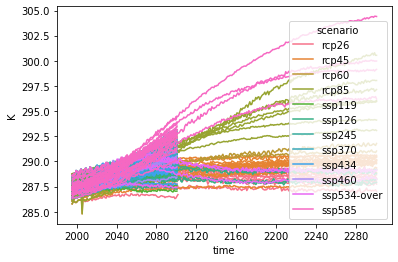

<IPython.core.display.Javascript object>

In [9]:
db_cmip.lineplot(hue="scenario", units="climate_model", estimator=None)

In [10]:
db_cmip.filter(year=range(2250, 2300 + 1), scenario="ssp*").timeseries().dropna(
    how="all"
)

time                                                                  2250-07-01 00:00:00  \
climate_model member_id model       region scenario    unit variable                        
CanESM5       r1i1p1f1  unspecified World  ssp126      K    tas                   288.739   
IPSL-CM6A-LR  r1i1p1f1  unspecified World  ssp126      K    tas                   287.871   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp126      K    tas                   287.959   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp126      K    tas                   288.894   
CanESM5       r1i1p1f1  unspecified World  ssp534-over K    tas                   289.047   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp534-over K    tas                   287.924   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp534-over K    tas                   289.044   
CanESM5       r1i1p1f1  unspecified World  ssp585      K    tas                   303.358   
IPSL-CM6A-LR  r1i1p1f1  unspecified World  ssp585      K    tas                   299.496   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp585      K    tas                   296.016   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp585      K    tas                   298.942   

time                                                                  2251-07-01 00:00:00  \
climate_model member_id model       region scenario    unit variable                        
CanESM5       r1i1p1f1  unspecified World  ssp126      K    tas                   288.766   
IPSL-CM6A-LR  r1i1p1f1  unspecified World  ssp126      K    tas                   288.045   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp126      K    tas                   287.999   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp126      K    tas                   288.999   
CanESM5       r1i1p1f1  unspecified World  ssp534-over K    tas                   289.026   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp534-over K    tas                   287.908   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp534-over K    tas                   288.887   
CanESM5       r1i1p1f1  unspecified World  ssp585      K    tas                   303.386   
IPSL-CM6A-LR  r1i1p1f1  unspecified World  ssp585      K    tas                   299.409   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp585      K    tas                   296.078   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp585      K    tas                   299.061   

time                                                                  2252-07-01 00:00:00  \
climate_model member_id model       region scenario    unit variable                        
CanESM5       r1i1p1f1  unspecified World  ssp126      K    tas                   288.901   
IPSL-CM6A-LR  r1i1p1f1  unspecified World  ssp126      K    tas                   287.757   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp126      K    tas                   288.002   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp126      K    tas                   289.115   
CanESM5       r1i1p1f1  unspecified World  ssp534-over K    tas                   288.977   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp534-over K    tas                   288.003   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp534-over K    tas                   289.029   
CanESM5       r1i1p1f1  unspecified World  ssp585      K    tas                   303.376   
IPSL-CM6A-LR  r1i1p1f1  unspecified World  ssp585      K    tas                   299.321   
MRI-ESM2-0    r1i1p1f1  unspecified World  ssp585      K    tas                   296.074   
UKESM1-0-LL   r4i1p1f2  unspecified World  ssp585      K    tas                   298.955   

time                                                                  2253-07-01 00:00:00  \
climate_model member_id model       region scenario    unit variable                        
CanESM5       r1i1p1f1  unspecified World  ssp126      K    tas                   288.859   
IPSL-CM6A-LR  r1i1p1f1  unspecified World  ssp126      K    tas                   287.649  

<IPython.core.display.Javascript object>

## RCM data

### MAGICC data

In [11]:
MAGICC_DIR = os.path.join(utils.MAGICC_OUTPUT_DIR, utils.MAGICC_SSP_RCP_OUTPUT_DIR)
db_magicc = scmdata.database.ScmDatabase(
    MAGICC_DIR, levels=("climate_model", "variable", "scenario")
)

<IPython.core.display.Javascript object>

In [12]:
magicc_data = db_magicc.load(
    climate_model="*", variable="Surface Air Temperature Change", scenario="*ssp*"
)
magicc_data.head()

Loading files:   0%|          | 0/33 [00:00<?, ?it/s]

time                                                                                           1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              4               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   

time                                                                                           1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              4               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   

time                                                                                           1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              4               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   

time                                                                                           1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              4               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   

time                                                                                           1754-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
MAGICCv7.5.1  0               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              1               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              2               unspecified World  ssp370   K    Surface Air Temperature Change                  NaN   
              3               unspecified World  ssp370   K    Surface Air Temperature Change         

<IPython.core.display.Javascript object>

In [13]:
magicc_data["scenario"].unique()

array(['ssp370', 'esm-ssp534-over-allGHG', 'esm-ssp460',
       'esm-ssp534-over', 'ssp119', 'ssp245', 'esm-ssp245-allGHG-WG3',
       'ssp245-1750-start', 'esm-ssp460-allGHG-WG3', 'esm-ssp119-allGHG',
       'esm-ssp434', 'esm-ssp434-allGHG-WG3', 'ssp585',
       'esm-ssp585-allGHG', 'esm-ssp126', 'esm-ssp434-allGHG',
       'esm-ssp119', 'esm-ssp585', 'esm-ssp126-allGHG-WG3',
       'esm-ssp370-allGHG-WG3', 'esm-ssp126-allGHG',
       'esm-ssp585-allGHG-WG3', 'ssp126', 'esm-ssp370',
       'esm-ssp370-allGHG', 'esm-ssp245', 'ssp534-over',
       'esm-ssp245-allGHG', 'esm-ssp460-allGHG', 'esm-ssp119-allGHG-WG3',
       'ssp460', 'esm-ssp534-over-allGHG-WG3', 'ssp434'], dtype=object)

<IPython.core.display.Javascript object>


###  OSCAR data

In [14]:
OSCAR_DIR = os.path.join(
    utils.DATA_DIR, "raw", "oscar", utils.OSCAR_VERSION, "scmdatabase"
)
display(OSCAR_DIR)
db_oscar = scmdata.database.ScmDatabase(
    OSCAR_DIR, levels=("climate_model", "variable", "scenario")
)
db_oscar.available_data()

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/oscar/v20210217/scmdatabase'

climate_model                                      variable      scenario
0    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014       1pctCO2
1    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014  abrupt-4xCO2
2    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014    historical
3    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp119
4    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp126
5    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp245
6    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp370
7    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp434
8    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp460
9    OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014   ssp534-over
10   OSCARv3.1.1  Surface-Air-Temperature-Change-wrt-1995-2014        ssp585

<IPython.core.display.Javascript object>

In [15]:
oscar_data = db_oscar.load(
    climate_model="*",
    variable="Surface Air Temperature Change|wrt 1995-2014",
    scenario="*ssp*",
)
oscar_data.head()

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

time                                                                                                     1850-01-01 00:00:00  \
climate_model ensemble_member model   region scenario unit variable                                                            
OSCARv3.1.1   0.00            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -2.536374   
              0.01            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.036152   
              0.02            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.035435   
              0.03            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.034718   
              0.04            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.031402   

time                                                                                                     1851-01-01 00:00:00  \
climate_model ensemble_member model   region scenario unit variable                                                            
OSCARv3.1.1   0.00            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -2.516627   
              0.01            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.028309   
              0.02            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.027592   
              0.03            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.026874   
              0.04            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.023549   

time                                                                                                     1852-01-01 00:00:00  \
climate_model ensemble_member model   region scenario unit variable                                                            
OSCARv3.1.1   0.00            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -2.510510   
              0.01            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.025422   
              0.02            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.024705   
              0.03            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.023988   
              0.04            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.020666   

time                                                                                                     1853-01-01 00:00:00  \
climate_model ensemble_member model   region scenario unit variable                                                            
OSCARv3.1.1   0.00            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -2.505056   
              0.01            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.023359   
              0.02            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.022642   
              0.03            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.021926   
              0.04            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -1.018608   

time                                                                                                     1854-01-01 00:00:00  \
climate_model ensemble_member model   region scenario unit variable                                                            
OSCARv3.1.1   0.00            AIM_CGE World  ssp370   K    Surface Air Temperature Change|wrt 1995-2014            -2.493714   
              0.01          

<IPython.core.display.Javascript object>

In [16]:
oscar_data["variable"] = "Surface Air Temperature Change"

<IPython.core.display.Javascript object>

In [17]:
OSCAR_SUMMARY_FILE = os.path.join(
    utils.DATA_DIR,
    "raw",
    "oscar",
    utils.OSCAR_VERSION,
    "IPCC_AR6_OSCAR_indicators.csv",
)
oscar_summary = pd.read_csv(OSCAR_SUMMARY_FILE)
oscar_summary = oscar_summary[
    oscar_summary["RCMIP name"].str.startswith("Surface Air Temperature Change World")
]
oscar_summary

RCMIP name climate_model unit  \
404   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
405   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
406   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
407   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
408   Surface Air Temperature Change World ssp245 19...   OSCARv3.1.1    K   
...                                                 ...           ...  ...   
3025  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   
3026  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   
3027  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   
3028  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   
3029  Surface Air Temperature Change World ssp585 20...   OSCARv3.1.1    K   

      ensemble_member     value  
404                 0 -0.514234  
405                 1  0.625508  
406                 2  0.626312  
407                 3  0.632336  
408                 4  0.643554  
...               ...       ...  
3025               96  3.726375  
3026               97  4.035269  
3027               98  4.036627  
3028               99  4.110214  
3029              100  5.904180  

[2525 rows x 5 columns]

<IPython.core.display.Javascript object>

###  Cicero data

In [18]:
CICERO_DIR = os.path.join(
    utils.DATA_DIR,
    "raw",
    "cicero",
    utils.CICERO_VERSION,
    "scmdatabase",
)
db_cicero = scmdata.database.ScmDatabase(
    CICERO_DIR, levels=("climate_model", "variable", "scenario")
)

<IPython.core.display.Javascript object>

In [19]:
cicero_data = db_cicero.load(
    climate_model="*", variable="Surface Air Temperature Change", scenario="*ssp*"
)
cicero_data.head()

Loading files:   0%|          | 0/10 [00:00<?, ?it/s]

time                                                                                           1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp370   K    Surface Air Temperature Change             0.064991   
              150             unspecified World  ssp370   K    Surface Air Temperature Change             0.118409   
              2420            unspecified World  ssp370   K    Surface Air Temperature Change             0.087551   
              2520            unspecified World  ssp370   K    Surface Air Temperature Change             0.119339   
              3110            unspecified World  ssp370   K    Surface Air Temperature Change             0.079923   

time                                                                                           1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp370   K    Surface Air Temperature Change             0.100960   
              150             unspecified World  ssp370   K    Surface Air Temperature Change             0.161447   
              2420            unspecified World  ssp370   K    Surface Air Temperature Change             0.119694   
              2520            unspecified World  ssp370   K    Surface Air Temperature Change             0.150579   
              3110            unspecified World  ssp370   K    Surface Air Temperature Change             0.121478   

time                                                                                           1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp370   K    Surface Air Temperature Change             0.125065   
              150             unspecified World  ssp370   K    Surface Air Temperature Change             0.175011   
              2420            unspecified World  ssp370   K    Surface Air Temperature Change             0.133716   
              2520            unspecified World  ssp370   K    Surface Air Temperature Change             0.163470   
              3110            unspecified World  ssp370   K    Surface Air Temperature Change             0.138489   

time                                                                                           1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp370   K    Surface Air Temperature Change             0.140984   
              150             unspecified World  ssp370   K    Surface Air Temperature Change             0.178284   
              2420            unspecified World  ssp370   K    Surface Air Temperature Change             0.139917   
              2520            unspecified World  ssp370   K    Surface Air Temperature Change             0.167774   
              3110            unspecified World  ssp370   K    Surface Air Temperature Change             0.145945   

time                                                                                           1754-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
Cicero-SCM    80              unspecified World  ssp370   K    Surface Air Temperature Change             0.150844   
              150             unspecified World  ssp370   K    Surface Air Temperature Change             0.177086   
              2420            unspecified World  ssp370   K    Surface Air Temperature Change             0.141949   
              2520            unspecified World  ssp370   K    Surface Air Temperature Change         

<IPython.core.display.Javascript object>

### FaIR data

In [20]:
FAIR_DIR = os.path.join(
    utils.DATA_DIR, "raw", "fair", utils.FAIR_VERSION, "scmdatabase"
)
db_fair = scmdata.database.ScmDatabase(
    FAIR_DIR, levels=("climate_model", "variable", "scenario")
)
fair_data = db_fair.load(
    climate_model="*", variable="Surface Air Temperature Change", scenario="*ssp*"
)
fair_data.head()

Loading files:   0%|          | 0/16 [00:00<?, ?it/s]

time                                                                                           1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp370   K    Surface Air Temperature Change             0.027773   
              1               unspecified World  ssp370   K    Surface Air Temperature Change             0.027427   
              2               unspecified World  ssp370   K    Surface Air Temperature Change             0.037725   
              3               unspecified World  ssp370   K    Surface Air Temperature Change             0.029093   
              4               unspecified World  ssp370   K    Surface Air Temperature Change             0.034272   

time                                                                                           1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp370   K    Surface Air Temperature Change             0.049784   
              1               unspecified World  ssp370   K    Surface Air Temperature Change             0.046396   
              2               unspecified World  ssp370   K    Surface Air Temperature Change             0.058335   
              3               unspecified World  ssp370   K    Surface Air Temperature Change             0.051564   
              4               unspecified World  ssp370   K    Surface Air Temperature Change             0.060837   

time                                                                                           1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp370   K    Surface Air Temperature Change             0.066297   
              1               unspecified World  ssp370   K    Surface Air Temperature Change             0.057564   
              2               unspecified World  ssp370   K    Surface Air Temperature Change             0.067246   
              3               unspecified World  ssp370   K    Surface Air Temperature Change             0.068282   
              4               unspecified World  ssp370   K    Surface Air Temperature Change             0.079796   

time                                                                                           1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp370   K    Surface Air Temperature Change             0.077479   
              1               unspecified World  ssp370   K    Surface Air Temperature Change             0.062055   
              2               unspecified World  ssp370   K    Surface Air Temperature Change             0.068115   
              3               unspecified World  ssp370   K    Surface Air Temperature Change             0.078017   
              4               unspecified World  ssp370   K    Surface Air Temperature Change             0.090674   

time                                                                                           1754-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit variable                                              
FaIRv1.6.2    0               unspecified World  ssp370   K    Surface Air Temperature Change             0.083798   
              1               unspecified World  ssp370   K    Surface Air Temperature Change             0.061441   
              2               unspecified World  ssp370   K    Surface Air Temperature Change             0.063852   
              3               unspecified World  ssp370   K    Surface Air Temperature Change         

<IPython.core.display.Javascript object>

### Ch. 7 emulator

In [21]:
db_ch7_two_layer = scmdata.database.ScmDatabase(
    os.path.join(
        utils.DATA_DIR,
        "raw",
        "two-layer-projections",
        utils.CH7_TWO_LAYER_VERSION,
    ),
    levels=("climate_model", "variable", "scenario"),
)

ch7_two_layer_data = (
    db_ch7_two_layer.load(
        climate_model="*", variable="Surface Air Temperature Change", scenario="*"
    )
    .filter(scenario=["rcp*", "ssp*"])
    .filter(scenario="*low*", keep=False)
)

ch7_two_layer_data["climate_model"] = ch7_two_layer_data["climate_model"] + " v20210213"
ch7_two_layer_data.head()

Loading files:   0%|          | 0/10 [00:00<?, ?it/s]

time                                                                                                       1750-01-01 00:00:00  \
climate_model             ensemble_member model       region scenario unit variable                                              
Ch. 7 two-layer v20210213 0               unspecified World  ssp370   K    Surface Air Temperature Change                  0.0   
                          1               unspecified World  ssp370   K    Surface Air Temperature Change                  0.0   
                          2               unspecified World  ssp370   K    Surface Air Temperature Change                  0.0   
                          3               unspecified World  ssp370   K    Surface Air Temperature Change                  0.0   
                          4               unspecified World  ssp370   K    Surface Air Temperature Change                  0.0   

time                                                                                                       1751-01-01 00:00:00  \
climate_model             ensemble_member model       region scenario unit variable                                              
Ch. 7 two-layer v20210213 0               unspecified World  ssp370   K    Surface Air Temperature Change             0.025008   
                          1               unspecified World  ssp370   K    Surface Air Temperature Change             0.024070   
                          2               unspecified World  ssp370   K    Surface Air Temperature Change             0.033846   
                          3               unspecified World  ssp370   K    Surface Air Temperature Change             0.026969   
                          4               unspecified World  ssp370   K    Surface Air Temperature Change             0.030775   

time                                                                                                       1752-01-01 00:00:00  \
climate_model             ensemble_member model       region scenario unit variable                                              
Ch. 7 two-layer v20210213 0               unspecified World  ssp370   K    Surface Air Temperature Change             0.046785   
                          1               unspecified World  ssp370   K    Surface Air Temperature Change             0.041484   
                          2               unspecified World  ssp370   K    Surface Air Temperature Change             0.053764   
                          3               unspecified World  ssp370   K    Surface Air Temperature Change             0.049918   
                          4               unspecified World  ssp370   K    Surface Air Temperature Change             0.056418   

time                                                                                                       1753-01-01 00:00:00  \
climate_model             ensemble_member model       region scenario unit variable                                              
Ch. 7 two-layer v20210213 0               unspecified World  ssp370   K    Surface Air Temperature Change             0.062363   
                          1               unspecified World  ssp370   K    Surface Air Temperature Change             0.050602   
                          2               unspecified World  ssp370   K    Surface Air Temperature Change             0.061169   
                          3               unspecified World  ssp370   K    Surface Air Temperature Change             0.064503   
                          4               unspecified World  ssp370   K    Surface Air Temperature Change             0.072739   

time                                                                                                       1754-01-01 00:00:00  \
climate_model             ensemble_member model       region scenario unit variable                                              
Ch. 7 two-layer v20210213 0               unspecified World  ssp370   K    Surface Air Temperatu

<IPython.core.display.Javascript object>

##  Plot

In [22]:
alldat = scmdata.run_append(
    [
        scmdata.ScmRun(v.timeseries(time_axis="year", drop_all_nan_times=True))
        for v in [
            db_cmip,
            magicc_data,
            oscar_data,
            cicero_data,
            fair_data,
            ch7_two_layer_data,
        ]
    ]
).filter(variable=["tas", "*Temp*"])
alldat.head()

time                                                                               1750-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1751-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1752-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1753-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1754-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified World  rcp26    K    tas                       NaN   

time                                                                               1755-01-01 00:00:00  \
climate_model ensemble_member member_id model       region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified World  rcp26    K    

<IPython.core.display.Javascript object>

In [23]:
def determine_model_family(cm):
    if "MAGICC" in cm:
        return cm

    if "Cicero-SCM" in cm:
        return "CICERO-SCM"

    if "OSCARv3.1" in cm:
        return cm

    if "FaIRv1.6.0c2" in cm:
        return "FaIRv1.6.0c2"

    if "FaIRv1.6.2" in cm:
        return "FaIRv1.6.2"

    if "Ch. 7" in cm:
        return cm

    return "CMIP6 MME"


alldat["model_family"] = alldat["climate_model"].apply(determine_model_family)
alldat.head()

time                                                                                            1750-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   

time                                                                                            1751-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   

time                                                                                            1752-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   

time                                                                                            1753-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CSIRO-Mk3-6-0 NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   

time                                                                                            1754-01-01 00:00:00  \
climate_model ensemble_member member_id model       model_family region scenario unit variable                        
BNU-ESM       NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CCSM4         NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-CAM5    NaN             r1i1p1    unspecified CMIP6 MME    World  rcp26    K    tas                       NaN   
CESM1-WACCM   NaN             r2i1p1    unspecified CMIP6 MME    Worl

<IPython.core.display.Javascript object>

In [24]:
def calculate_median(inp, evaluation_period):
    return (
        inp.filter(year=evaluation_period).timeseries().mean(axis="columns")
    ).median()


def set_median_to_zero(
    inp,
    ref_period,
    evaluation_period,
    groupby=(
        "model_family",
        "scenario",
    ),
):
    out = []
    for sdf in inp.groupby(groupby):
        sdf_rebased = sdf.relative_to_ref_period_mean(year=ref_period)
        sdf_rebased_median = calculate_median(sdf_rebased, evaluation_period)
        sdf_rebased_shifted = sdf_rebased - sdf_rebased_median
        np.testing.assert_allclose(
            calculate_median(sdf_rebased_shifted, evaluation_period), 0, atol=1e-10
        )
        out.append(scmdata.ScmRun(sdf_rebased_shifted))

    out = scmdata.run_append(out)

    return out

<IPython.core.display.Javascript object>

In [25]:
def make_ts_ax(
    scmrun,
    cmip6_dat,
    ch4_dat,
    ax,
    hue_palette=None,
    hue_var="climate_model",
    hue_label="Climate model",
    style_dict=None,
    style_var="scenario",
    style_label="Scenario",
    quantiles_plumes=[
        ((0.05, 0.95), 0.5),
        ((0.5,), 1.0),
    ],
    linewidth=3,
    alpha=0.7,
    linewidth_cmip6=0.5,
    alpha_cmip6=0.4,
    colour_cmip6="black",
    linewidth_ch4=3,
    alpha_ch4=0.8,
    alpha_ch4_plume=0.3,
    colour_ch4="tab:blue",
    linestyle_ch4="--",
    quantile_over=("ensemble_member",),
    loc_legend="upper left",
):
    _quantiles_calc = []
    for q, _ in quantiles_plumes:
        for v in q:
            _quantiles_calc.append(v)

    summary_stats = scmdata.ScmRun(
        scmrun.quantiles_over(
            cols=quantile_over,
            quantiles=_quantiles_calc,
        )
    )
    ax, legend_items = summary_stats.plumeplot(
        ax=ax,
        time_axis="year",
        palette=hue_palette,
        hue_var=hue_var,
        hue_label=hue_label,
        dashes=style_dict,
        style_var=style_var,
        style_label=style_label,
        quantiles_plumes=quantiles_plumes,
        linewidth=linewidth,
        pre_calculated=True,
    )

    ch4_line = ax.plot(
        ch4_dat["year"],
        ch4_dat.filter(percentile=50).values.squeeze(),
        linewidth=linewidth_ch4,
        alpha=alpha_ch4,
        color=colour_ch4,
        label="Ch. 4 assessed range",
        linestyle=linestyle_ch4,
    )[0]
    ax.fill_between(
        ch4_dat["year"],
        ch4_dat.filter(percentile=5).values.squeeze(),
        ch4_dat.filter(percentile=95).values.squeeze(),
        alpha=alpha_ch4_plume,
        color=colour_ch4,
    )

    ax = cmip6_dat.lineplot(
        units="climate_model",
        estimator=None,
        ax=ax,
        time_axis="year",
        linewidth=linewidth_cmip6,
        alpha=alpha_cmip6,
        palette=[colour_cmip6],
    )
    cmip6_line_fake = mlines.Line2D(
        [0],
        [0],
        **{"color": colour_cmip6, "linewidth": linewidth_cmip6},
        label=cmip6_dat.get_unique_meta(hue_var, no_duplicates=True)
    )

    legend_items_new = []
    for v in legend_items:
        legend_items_new.append(v)

        if isinstance(v, mpatches.Patch):
            if v.get_label() == "Source":
                legend_items_new.append(cmip6_line_fake)
                legend_items_new.append(ch4_line)

    ax.legend(handles=legend_items_new, loc=loc_legend)

    return ax, legend_items

<IPython.core.display.Javascript object>

In [26]:
def take_20_year_mean(inp):
    out = (
        inp.timeseries(time_axis="year")
        .dropna(axis="rows", how="all")
        .rolling(window=20, center=True, axis="columns")
        .mean()
        .dropna(axis="columns", how="all")
    )
    # adjust columns by six months so they properly sit on the centre
    out.columns = out.columns.map(lambda x: dt.datetime(x - 1, 7, 2))

    return scmdata.ScmRun(out)

<IPython.core.display.Javascript object>

In [27]:
def get_pdf_subbox(median, upper, lower, source, scenario, time_range):
    out = [
        {
            "value": float(median),
            "source": source,
            "scenario": scenario,
            "time_range": "{}-{}".format(time_range[0], time_range[-1]),
        }
    ]
    for i in range(50):
        out.append(
            {
                "value": float(upper),
                "source": source,
                "scenario": scenario,
                "time_range": "{}-{}".format(time_range[0], time_range[-1]),
            }
        )
        out.append(
            {
                "value": float(lower),
                "source": source,
                "scenario": scenario,
                "time_range": "{}-{}".format(time_range[0], time_range[-1]),
            }
        )

    return pd.DataFrame(out)

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/ipykernel_launcher.py:318: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


'box7-1_ssp126_1995-2100_cmip-mode_emulator-assessed-ranges-timeseries.pdf'

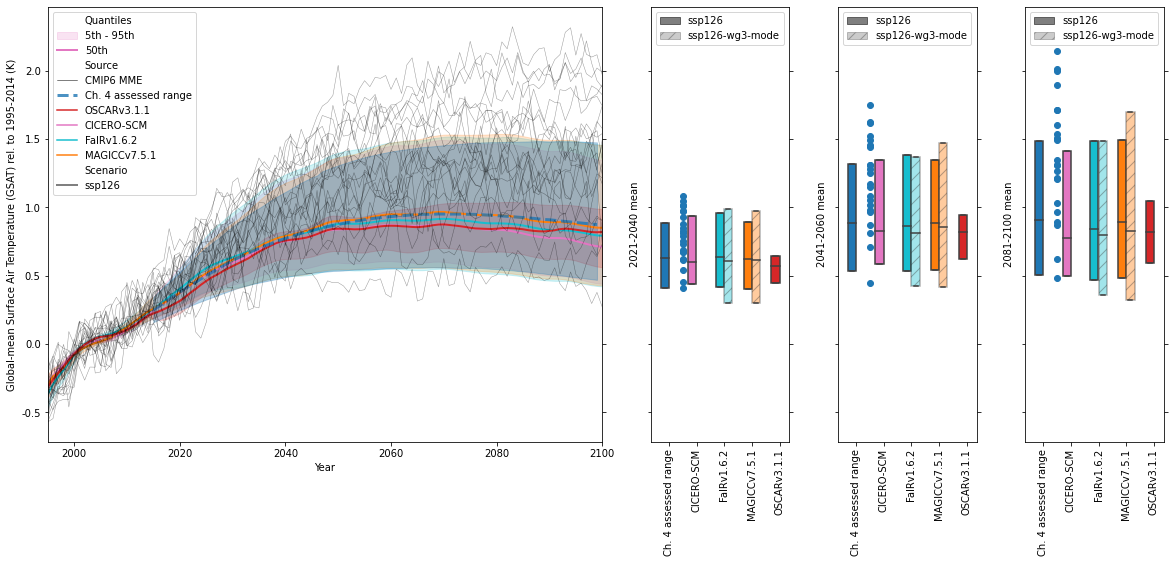

'box7-1_ssp126_1995-2100_cmip_models.csv'

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/ipykernel_launcher.py:318: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


'box7-1_ssp585_1995-2100_cmip-mode_emulator-assessed-ranges-timeseries.pdf'

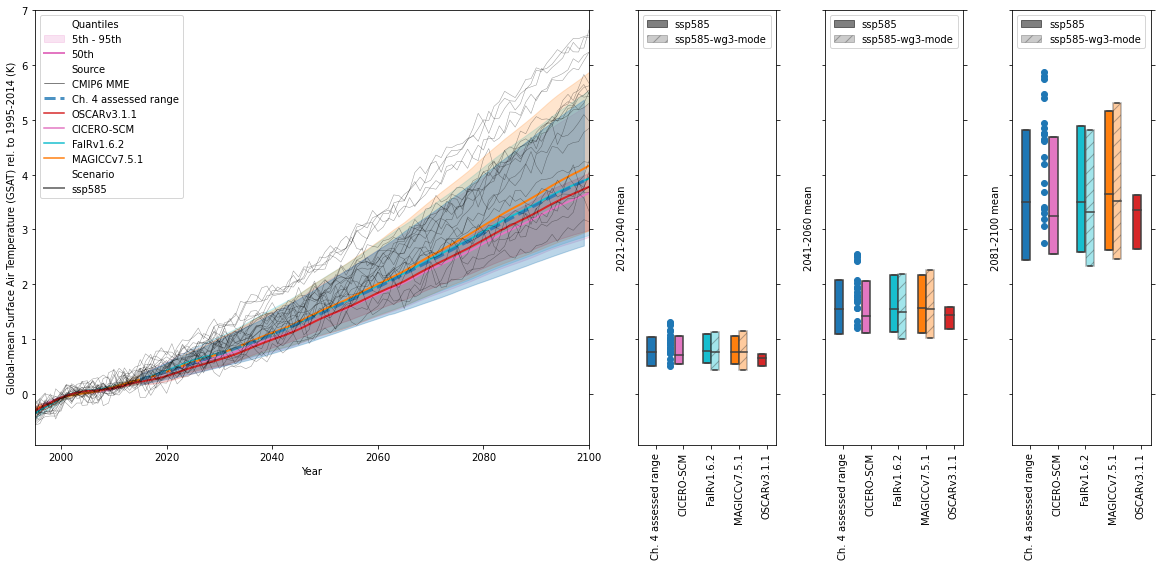

'box7-1_ssp585_1995-2100_cmip_models.csv'

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/ipykernel_launcher.py:318: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


'box7-1_ssp126_1995-2150_cmip-mode_emulator-assessed-ranges-timeseries.pdf'

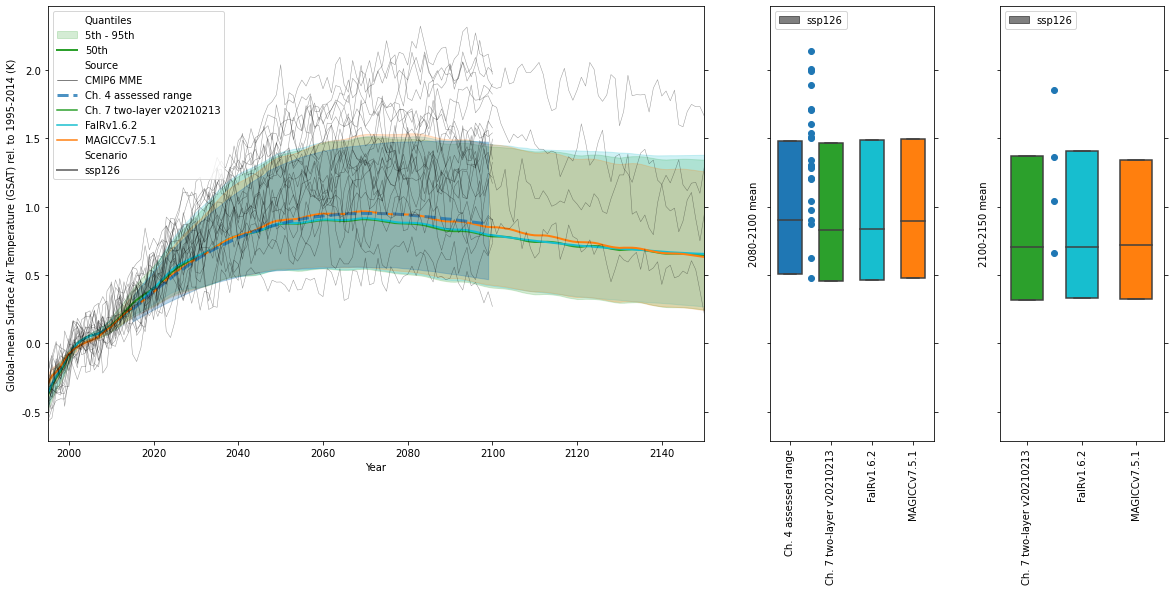

'box7-1_ssp126_1995-2150_cmip_models.csv'

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/ipykernel_launcher.py:318: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


'box7-1_ssp585_1995-2150_cmip-mode_emulator-assessed-ranges-timeseries.pdf'

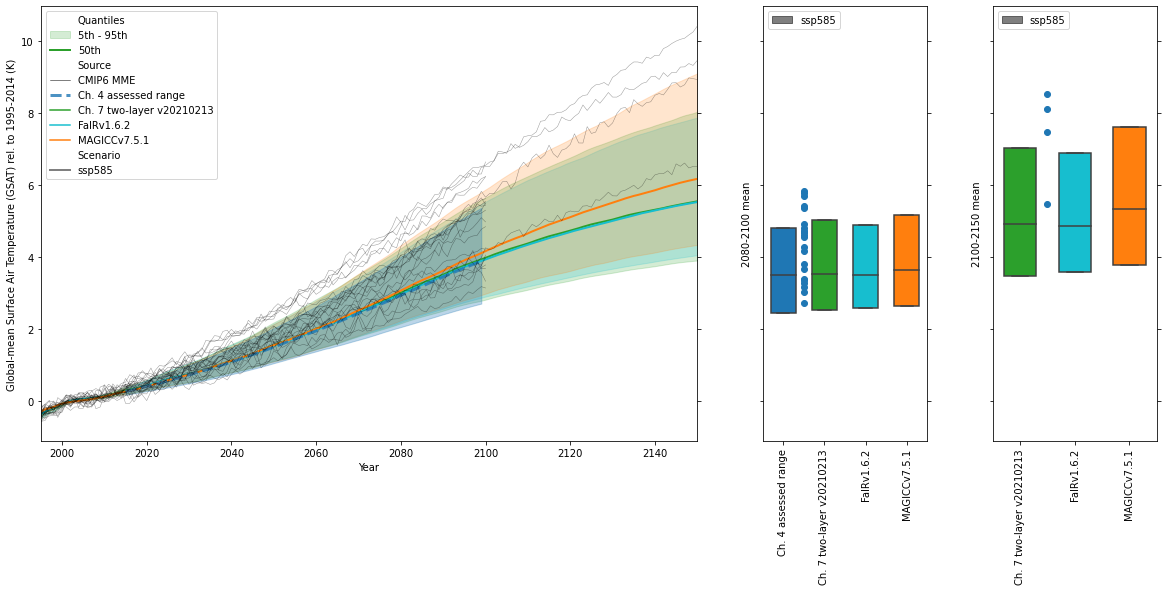

'box7-1_ssp585_1995-2150_cmip_models.csv'

<IPython.core.display.Javascript object>

In [29]:
quantiles_plumes = [
    ((0.05, 0.95), 0.2),
    ((0.5,), 1.0),
]
scenarios = [
    #     "ssp119",
    "ssp126",
    #     "ssp245",
    #     "ssp370",
    "ssp585",
]
wg3_mode = False
# wg3_mode = True
# smooth_emulators = True
smooth_emulators = False

ch4_name = "Ch. 4 assessed range"
ch4_assessment["model_family"] = ch4_name
hue_var = "model_family"
hue_palette = utils.plotting.RCM_PALETTE
hue_palette[ch4_name] = "tab:blue"
hue_palette["Ch. 7 two-layer v20210213"] = "tab:green"
hue_palette["Ch. 7 two-layer v20201021"] = "tab:brown"

ref_period = range(1850, 1900 + 1)
zero_median_period = range(1995, 2014 + 1)
figsize = (20, 8)


to_plot_model_families = [
    "CMIP6 MME",
    "MAGICCv7.5.1",
    #     "OSCARv3.1.1",
    #     "CICERO-SCM",
    "FaIRv1.6.2",
    "Ch. 7 two-layer v20210213",
]

for time_ranges, plt_years, show_wg3_mode_in_box, to_plot_model_families in (
    (
        (range(2021, 2040 + 1), range(2041, 2060 + 1), range(2081, 2100 + 1)),
        range(1995, 2100 + 1),
        True,
        [
            "CMIP6 MME",
            "MAGICCv7.5.1",
            "OSCARv3.1.1",
            "CICERO-SCM",
            "FaIRv1.6.2",
        ],
    ),
    (
        (
            range(2080, 2100 + 1),
            range(2100, 2150 + 1),
        ),
        range(1995, 2150 + 1),
        False,
        [
            "CMIP6 MME",
            "MAGICCv7.5.1",
            "FaIRv1.6.2",
            "Ch. 7 two-layer v20210213",
        ],
    ),
):
    alldat_tp = alldat.filter(model_family=to_plot_model_families)
    for scenario in sorted(scenarios):
        pdf_ch4 = ch4_assessment.filter(scenario=scenario)

        esm_scenario = "esm-{}-allGHG".format(scenario)
        wg3_magicc_scenario = "esm-{}-allGHG-WG3".format(scenario)

        pdf = scmdata.run_append(
            [
                alldat_tp.filter(
                    scenario=[
                        scenario,
                    ]
                ),
                alldat_tp.filter(scenario=[esm_scenario]).filter(
                    model_family="MAGICC*", keep=False
                ),
                alldat_tp.filter(
                    scenario=[wg3_magicc_scenario], model_family="MAGICC*"
                ),
            ]
        )

        pdf_cmip = (
            pdf.filter(model_family="CMIP6*")
            .relative_to_ref_period_mean(year=zero_median_period)
            .filter(year=plt_years)
        )

        pdf_emulators = pdf.filter(model_family="CMIP6*", keep=False)
        wg3_mode_label = "{}-wg3-mode".format(scenario)
        pdf_emulators["scenario"] = pdf_emulators["scenario"].map(
            {
                scenario: scenario,
                wg3_magicc_scenario: wg3_mode_label,
                esm_scenario: wg3_mode_label,
            }
        )

        # Match calculation used by Ch. 4 for the concentration-driven runs
        # i.e. make all ensemble members have zero mean over the reference period
        # which is what is also done for the different Ch. 4 climate sensitivity
        # values in their internal processing. This ensures a like for like
        # comparison.
        pdf_emulators_conc_driven = pdf_emulators.filter(scenario=scenario)
        pdf_emulators_conc_driven = (
            pdf_emulators_conc_driven.relative_to_ref_period_mean(
                year=zero_median_period
            )
        )

        # Adjust median of WG3 mode without touching spread of historical warming
        # (as will be done in WG3)
        pdf_emulators_wg3mode = pdf_emulators.filter(scenario="*wg3-mode")
        pdf_emulators_wg3mode = set_median_to_zero(
            pdf_emulators_wg3mode,
            ref_period,
            zero_median_period,
            groupby=("model_family", "scenario"),
        )
        pdf_emulators_wg3mode = pdf_emulators_wg3mode

        pdf_emulators = scmdata.run_append(
            [pdf_emulators_wg3mode, pdf_emulators_conc_driven]
        )

        if wg3_mode:
            pdf_emulators_line = pdf_emulators_wg3mode
        else:
            pdf_emulators_line = pdf_emulators_conc_driven

        if smooth_emulators:
            pdf_emulators_line = take_20_year_mean(pdf_emulators_line)

        pdf_emulators_line = pdf_emulators_line.filter(year=plt_years)

        fig = plt.figure(figsize=figsize)
        gs = GridSpec(
            1,
            1 + len(time_ranges),
            width_ratios=[4] + [1] * +len(time_ranges),
            wspace=0.2,
        )

        ax_ts = fig.add_subplot(gs[0, 0])
        ax_ts.tick_params(right=True)

        axes = [fig.add_subplot(gs[0, i + 1]) for i in range(len(time_ranges))]

        ax_ts, legend_items = make_ts_ax(
            pdf_emulators_line,
            pdf_cmip,
            pdf_ch4,
            ax_ts,
            hue_palette=hue_palette,
            hue_var=hue_var,
            hue_label="Source",
            style_dict={
                scenario: "-",
                esm_scenario: "-",
                wg3_magicc_scenario: "-",
                wg3_mode_label: "-",
            },
            style_var="scenario",
            style_label="Scenario",
            quantiles_plumes=quantiles_plumes,
            linewidth=2,
        )

        ax_ts.set_xlim(plt_years[0], plt_years[-1])
        ylim = ax_ts.get_ylim()
        ax_ts.set_xlabel("Year")
        ax_ts.set_ylabel(
            f"Global-mean Surface Air Temperature (GSAT) rel. to "
            f"{zero_median_period[0]}-{zero_median_period[-1]} "
            f"({pdf_cmip.get_unique_meta('unit', no_duplicates=True)})"
        )

        pdf_emulators = take_20_year_mean(pdf_emulators)

        for ax, time_range in zip(axes, time_ranges):
            time_range_mid_point = (time_range[0] + time_range[-1]) / 2
            int_year = int(time_range_mid_point)

            pdf_ch4_year = pdf_ch4.filter(year=int_year + 1)  # Ch. 4 times rounded up

            try:
                box_ch4 = get_pdf_subbox(
                    median=pdf_ch4_year.filter(percentile=50).values.squeeze(),
                    upper=pdf_ch4_year.filter(percentile=95).values.squeeze(),
                    lower=pdf_ch4_year.filter(percentile=5).values.squeeze(),
                    source=ch4_name,
                    scenario=scenario,
                    time_range=time_range,
                )

                pdf_box = [box_ch4]
                box_data = [box_ch4["value"].values.squeeze()]
                box_labels = [(ch4_name, scenario)]
            except TypeError:
                pdf_box = []
                box_data = []
                box_labels = []

            for cm_scenario_scmrun in pdf_emulators.groupby((hue_var, "scenario")):
                cm = cm_scenario_scmrun.get_unique_meta(hue_var, no_duplicates=True)
                cm_scenario = cm_scenario_scmrun.get_unique_meta(
                    "scenario", no_duplicates=True
                )
                if (not show_wg3_mode_in_box) and "wg3" in cm_scenario:
                    continue

                if cm.startswith("OSCAR"):
                    # don't have ensemble members so have to use reported data
                    oscar_rcmip_name = f"Surface Air Temperature Change World {cm_scenario} {time_range[0]}-{time_range[-1]}"
                    oscar_reported = oscar_summary[
                        (oscar_summary["RCMIP name"] == oscar_rcmip_name)
                    ]
                    cm_scenario_scmrun_subbox = get_pdf_subbox(
                        median=oscar_reported["value"].median(),
                        upper=oscar_reported["value"].quantile(q=0.95),
                        lower=oscar_reported["value"].quantile(q=0.05),
                        source=cm,
                        scenario=cm_scenario,
                        time_range=time_range,
                    )

                else:
                    # calculate from ensemble members

                    cm_scenario_scmrun_year = cm_scenario_scmrun.filter(
                        year=int_year, month=7
                    )

                    cm_scenario_scmrun_subbox = get_pdf_subbox(
                        median=cm_scenario_scmrun_year.process_over(
                            ("ensemble_member",), "quantile", q=0.5
                        ).values.squeeze(),
                        upper=cm_scenario_scmrun_year.process_over(
                            ("ensemble_member",), "quantile", q=0.95
                        ).values.squeeze(),
                        lower=cm_scenario_scmrun_year.process_over(
                            ("ensemble_member",), "quantile", q=0.05
                        ).values.squeeze(),
                        source=cm,
                        scenario=cm_scenario,
                        time_range=time_range,
                    )

                pdf_box.append(cm_scenario_scmrun_subbox)
                box_data.append(pdf_box[-1]["value"].values.squeeze())
                box_labels.append((cm, cm_scenario))

            pdf_box = pd.concat(pdf_box)

            ax = sns.boxplot(
                data=pdf_box,
                x="source",
                y="value",
                ax=ax,
                whis=0,
                hue="scenario",
                width=0.6,
                #             patch_artist=True,
            )
            xvals = ax.get_xticks()
            xlabels = [v.get_text() for v in ax.get_xticklabels()]

            for v in ax.get_children():
                if v.get_label() == scenario:
                    scenario_colour = v.get_facecolor()
                    v.set_facecolor("tab:gray")
                elif v.get_label() == wg3_mode_label:
                    wg3_magicc_scenario_colour = v.get_facecolor()
                    v.set_facecolor("tab:gray")
                    v.set_alpha(0.4)
                    v.set_hatch("//")

            for v in ax.get_children():
                if isinstance(v, mpatches.PathPatch):
                    current_colour = v.get_facecolor()

                    x_spot = np.round(v.get_path().vertices[0][0], 0)
                    x_index = np.where(xvals == x_spot)[0][0]
                    label = xlabels[x_index]
                    v.set_facecolor(hue_palette[label])
                    if current_colour == wg3_magicc_scenario_colour:
                        v.set_hatch("//")
                        v.set_alpha(0.4)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
            ax.set_yticklabels([])
            ax.set_ylim(ylim)
            ax.tick_params(right=True)
            ax.set_ylabel(f"{time_range[0]}-{time_range[-1]} mean")
            ax.set_xlabel("")
            ax.legend(loc="upper left")

            scat_vals = (
                pdf_cmip.filter(year=time_range)
                .timeseries()
                .dropna()
                .mean(axis="columns")
                .values
            )
            ax.scatter(
                np.ones_like(scat_vals) * 0.5,
                scat_vals,
                marker="o",
            )

        plt.tight_layout()
        wg3_comparison = "wg3-mode" if wg3_mode else "cmip-mode"
        out_file = (
            f"box7-1_{scenario}_{plt_years[0]}-{plt_years[-1]}_"
            f"{wg3_comparison}_emulator-assessed-ranges-timeseries.pdf"
        )
        display(out_file)
        #         plt.savefig(
        #             out_file,
        #             transparent=True,
        #         )

        plt.show()

        out_file_cmip_data = (
            f"box7-1_{scenario}_{plt_years[0]}-{plt_years[-1]}_" f"cmip_models.csv"
        )
        display(out_file_cmip_data)
        pdf_cmip.timeseries().dropna(how="all").reset_index()[
            ["climate_model", "member_id"]
        ].drop_duplicates()  # .to_csv(out_file_cmip_data, index=False)
    #     break